<h1> <b> Kiavash jamshidi 810197486 </b> </h1>

In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

In [18]:
!tar -xzf UTKFace.tar.gz

In [1]:
import PIL
import glob
import keras
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import layers
from tensorflow import keras
from tensorflow.keras import *
from keras import backend as K
from keras.models import Sequential
from keras import regularizers, optimizers
from keras.preprocessing.image import image
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [19]:
images = glob.glob("/content/UTKFace" + '/*.jpg')

In [24]:
def getRace(img):
  fileNameImg = img.split("/")[3].split(".")[0]
  fileNameImgInfo = fileNameImg.split("_")
  age, gender, race = fileNameImgInfo[0], fileNameImgInfo[1], fileNameImgInfo[2]
  return race

In [21]:
def validImg(img):
  return img.count('_') == 3

In [34]:
def showAccuracy(modelFit):
  plt.plot(modelFit.history['accuracy'],color='green')
  plt.plot(modelFit.history['val_accuracy'],color = 'red')
  plt.title('Accuracy of this section')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [35]:
def showLoss(modelFit):
  plt.plot(modelFit.history['loss'], color = 'green')
  plt.plot(modelFit.history['val_loss'], color = 'red')
  plt.title('Loss of this section')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'])
  plt.show()

In [3]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [31]:
def predict(model):
  y_test_pred = []
  y_test_true = []
  y_train_pred = []
  y_train_true = []

  for i in range(len(testGenerator)):
    pic = testGenerator[i][0][0].reshape(100,100)
    x = model.predict(np.reshape(testGenerator[i][0][0],[1,100,100,1]))
    predictClass = np.argmax(x,axis=1)
    y_test_pred.append(predictClass[0])
    for j in range(len(testGenerator[i][1][0])):
      if testGenerator[i][1][0][j]:
        y_test_true.append(j)
        break

  for i in range(len(trainGenerator)):
    pic = trainGenerator[i][0][0].reshape(100,100)
    x = model.predict(np.reshape(trainGenerator[i][0][0],[1,100,100,1]))
    predictClass = np.argmax(x,axis=1)
    y_train_pred.append(predictClass[0])
    for j in range(len(trainGenerator[i][1][0])):
      if trainGenerator[i][1][0][j]:
        y_train_true.append(j)
        break

  print("Train:")
  print(classification_report(y_train_true, y_train_pred, target_names=['Race 0','Race 1','Race 2','Race 3','Race 4']))
  print("Test:")
  print(classification_report(y_test_true, y_test_pred, target_names=['Race 0','Race 1','Race 2','Race 3','Race 4']))

In [22]:
for img in images:
  if not validImg(img):
    images.remove(img)
print("Number of valid datas:",len(images))

Number of valid datas: 23705


In [50]:
races = {}
for img in images:
  race = getRace(img)
  if race in races: continue
  races[race] = 0
print("Races :"," ".join(races.keys()))

Races : 1 0 4 2 3


In [51]:
for img in images:
  races[getRace(img)] += 1
for k in races:
  print("Race {} with {} number.".format(k,races[k]))

Race 1 with 4526 number.
Race 0 with 10078 number.
Race 4 with 1692 number.
Race 2 with 3434 number.
Race 3 with 3975 number.


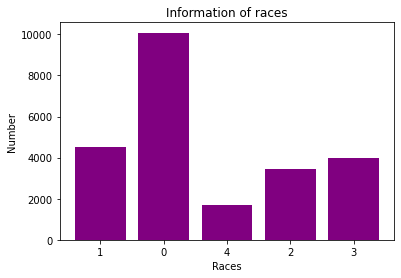

In [52]:
names = list(races.keys())
values = list(races.values())

plt.bar(range(len(races)), values, tick_label=names, color = 'purple')
plt.title("Information of races")
plt.xlabel('Races')
plt.ylabel('Number')
plt.show()

No handles with labels found to put in legend.


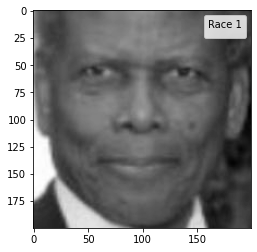

No handles with labels found to put in legend.


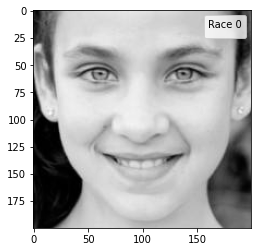

No handles with labels found to put in legend.


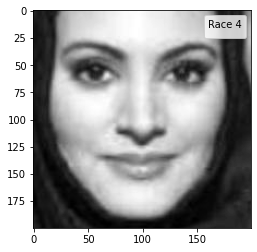

No handles with labels found to put in legend.


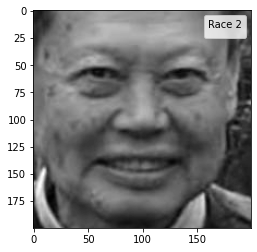

No handles with labels found to put in legend.


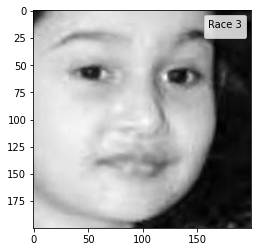

In [53]:
raceVisited = {x:False for x in races}
numClassVisited = 0
for img in images:
  if numClassVisited == len(raceVisited): continue
  race = getRace(img)
  if not raceVisited[race]:
    numClassVisited += 1
    raceVisited[race] = True
    pic = PIL.Image.open(img)

    grayImg = pic.convert("L")
    grayImgArr = np.asarray(grayImg)

    plt.imshow(grayImgArr, cmap='gray')
    plt.legend(title = "Race " + str(race))
    plt.show()
    print("\n")

In [25]:
labels = []
for img in images:
  labels.append(getRace(img))

In [26]:
df = pd.DataFrame({'address':images, 'label' : labels})
df

,address,label
0,/content/UTKFace/25_1_1_20170117142659506.jpg....,1
1,/content/UTKFace/7_0_3_20170119144311624.jpg.c...,3
2,/content/UTKFace/1_1_3_20161220220119985.jpg.c...,3
3,/content/UTKFace/70_0_0_20170117175207508.jpg....,0
4,/content/UTKFace/35_0_1_20170113155156475.jpg....,1
...,...,...
23700,/content/UTKFace/35_0_1_20170113182403214.jpg....,1
23701,/content/UTKFace/28_0_1_20170113133624449.jpg....,1
23702,/content/UTKFace/58_1_1_20170112213645366.jpg....,1
23703,/content/UTKFace/30_0_1_20170117123820956.jpg....,1


In [56]:
df = pd.DataFrame({'address':images, 'label' : labels})
y = df.label
oneHotEncode = to_categorical(y,dtype = "uint8")
for row in range(len(df.label)):
  replaceValue = ""
  for char in oneHotEncode[row].astype(str):
    replaceValue += char
  df.at[row,'label'] = replaceValue
df

,address,label
0,/content/UTKFace/65_0_1_20170120223029947.jpg....,01000
1,/content/UTKFace/13_1_0_20170109214314841.jpg....,10000
2,/content/UTKFace/30_1_4_20170109135421119.jpg....,00001
3,/content/UTKFace/70_0_2_20170116192621613.jpg....,00100
4,/content/UTKFace/7_1_3_20161220222033539.jpg.c...,00010
...,...,...
23700,/content/UTKFace/26_0_1_20170117195838909.jpg....,01000
23701,/content/UTKFace/16_0_0_20170110232332618.jpg....,10000
23702,/content/UTKFace/1_0_1_20170110213647161.jpg.c...,01000
23703,/content/UTKFace/56_1_0_20170110122842545.jpg....,10000


In [27]:
dataGenerator = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

trainGenerator = dataGenerator.flow_from_dataframe(
  dataframe = df,
  x_col = "address",
  y_col = "label",
  subset = "training",
  batch_size = 32,
  shuffle = True,
  class_mode = "categorical",
  target_size = (100,100),
  color_mode = "grayscale"
)

testGenerator = dataGenerator.flow_from_dataframe(
  dataframe = df,
  x_col = "address",
  y_col = "label",
  subset = "validation",
  batch_size = 32,
  shuffle = True,
  class_mode = "categorical",
  target_size = (100,100),
  color_mode = "grayscale"
)


Found 17779 validated image filenames belonging to 5 classes.
Found 5926 validated image filenames belonging to 5 classes.


In [58]:
def neuralNetwork(activation = 'relu',opt = 'SGD', momentum = 0,loss = "categorical_crossentropy",regularization = 0,dropOut = 0):
  inputLayer = layers.Input(shape=(100,100,1))
  flatten = layers.Flatten()(inputLayer)
  if regularization == 0:
    firstLayer = layers.Dense(64, activation = activation)(flatten)
    if dropOut: firstLayer = layers.Dropout(0.1)(firstLayer)
    secondLayer = layers.Dense(64, activation = activation)(firstLayer)
    if dropOut: secondLayer = layers.Dropout(0.1)(secondLayer)
    finalLayer = layers.Dense(5, activation="softmax")(secondLayer)
  elif regularization == 1:
    firstLayer = layers.Dense(64, activation = activation, kernel_regularizer=regularizers.l2(l2=0.0001))(flatten)
    if dropOut: firstLayer = layers.Dropout(0.1)(firstLayer)
    secondLayer = layers.Dense(64, activation = activation, kernel_regularizer=regularizers.l2(l2=0.0001))(firstLayer)
    if dropOut: secondLayer = layers.Dropout(0.1)(secondLayer)
    finalLayer = layers.Dense(5, activation="softmax", kernel_regularizer=regularizers.l2(l2=0.0001))(secondLayer)
  model = models.Model(inputs=inputLayer, outputs=finalLayer)
  if opt == 'SGD':
    if momentum == 0:
      model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=loss, metrics=["accuracy", f1_m, precision_m, recall_m])
    else:
      model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum = momentum), loss=loss, metrics=["accuracy", f1_m, precision_m, recall_m])
  elif opt == 'adam':
    model.compile(optimizer=opt, loss=loss, metrics=["accuracy", f1_m, precision_m, recall_m])
  model.summary()
  return model

<h2> <b>With Relu activation function and SGD optimizer</b> </h2>

In [59]:
model = neuralNetwork(activation = 'relu')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [60]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 29s 52ms/step - loss: 1.3162 - accuracy: 0.4857 - f1_m: 0.3119 - precision_m: 0.6100 - recall_m: 0.2319 - val_loss: 1.1650 - val_accuracy: 0.5552 - val_f1_m: 0.4818 - val_precision_m: 0.6889 - val_recall_m: 0.3739
Epoch 2/10
556/556 [==============================] - 27s 48ms/step - loss: 1.1422 - accuracy: 0.5740 - f1_m: 0.4898 - precision_m: 0.6973 - recall_m: 0.3873 - val_loss: 1.0066 - val_accuracy: 0.6434 - val_f1_m: 0.5759 - val_precision_m: 0.7773 - val_recall_m: 0.4622
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 1.0585 - accuracy: 0.6094 - f1_m: 0.5562 - precision_m: 0.7088 - recall_m: 0.4638 - val_loss: 0.9664 - val_accuracy: 0.6353 - val_f1_m: 0.6091 - val_precision_m: 0.7221 - val_recall_m: 0.5290
Epoch 4/10
556/556 [==============================] - 27s 48ms/step - loss: 1.0005 - accuracy: 0.6366 - f1_m: 0.5918 - precision_m: 0.7290 - recall_m: 0.5029 - val_loss: 0.9422 - val_accuracy: 0.6

In [61]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        39
      Race 1       0.69      0.54      0.60        89
      Race 2       0.89      0.54      0.67       101
      Race 3       0.88      0.72      0.79       117
      Race 4       0.61      0.95      0.75       210

    accuracy                           0.69       556
   macro avg       0.61      0.55      0.56       556
weighted avg       0.69      0.69      0.67       556

Test:
              precision    recall  f1-score   support

      Race 0       1.00      0.11      0.20        18
      Race 1       0.73      0.55      0.63        29
      Race 2       0.93      0.54      0.68        26
      Race 3       0.90      0.63      0.75        30
      Race 4       0.61      0.93      0.74        83

    accuracy                           0.69       186
   macro avg       0.84      0.55      0.60       186
weighted avg       0.76      0.69      0.66       186



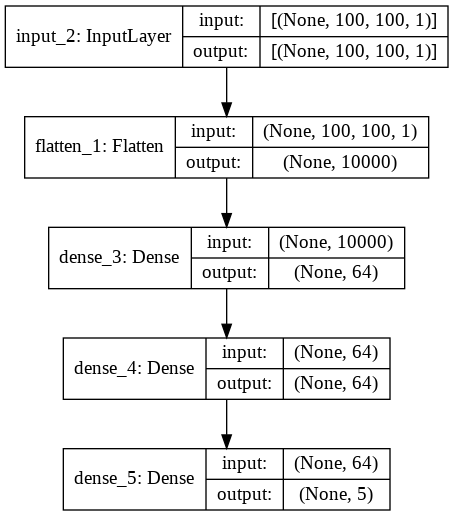

In [62]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

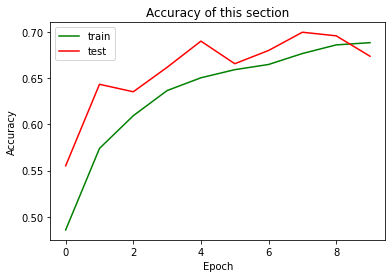

In [63]:
showAccuracy(modelFit)

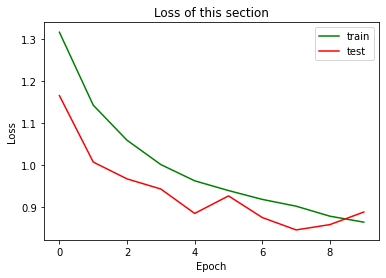

In [64]:
showLoss(modelFit)

<h2> <b>With Tanh activation function and SGD optimizer</b> </h2>

In [65]:
model = neuralNetwork(activation = 'tanh')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [66]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 32s 57ms/step - loss: 1.2759 - accuracy: 0.4977 - f1_m: 0.3392 - precision_m: 0.6172 - recall_m: 0.2571 - val_loss: 1.1508 - val_accuracy: 0.5469 - val_f1_m: 0.5250 - val_precision_m: 0.6389 - val_recall_m: 0.4481
Epoch 2/10
556/556 [==============================] - 27s 48ms/step - loss: 1.1153 - accuracy: 0.5786 - f1_m: 0.5183 - precision_m: 0.6991 - recall_m: 0.4214 - val_loss: 1.0328 - val_accuracy: 0.6065 - val_f1_m: 0.5667 - val_precision_m: 0.7153 - val_recall_m: 0.4723
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 1.0286 - accuracy: 0.6175 - f1_m: 0.5727 - precision_m: 0.7143 - recall_m: 0.4843 - val_loss: 0.9799 - val_accuracy: 0.6380 - val_f1_m: 0.5820 - val_precision_m: 0.7554 - val_recall_m: 0.4766
Epoch 4/10
556/556 [==============================] - 27s 49ms/step - loss: 0.9827 - accuracy: 0.6370 - f1_m: 0.6045 - precision_m: 0.7328 - recall_m: 0.5187 - val_loss: 0.9747 - val_accuracy: 0.6

In [67]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.25      0.03      0.05        37
      Race 1       0.70      0.60      0.65        90
      Race 2       0.73      0.56      0.63        71
      Race 3       0.76      0.75      0.75       118
      Race 4       0.70      0.89      0.79       240

    accuracy                           0.71       556
   macro avg       0.63      0.57      0.57       556
weighted avg       0.69      0.71      0.69       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        16
      Race 1       0.64      0.47      0.54        30
      Race 2       0.83      0.62      0.71        24
      Race 3       0.89      0.84      0.86        38
      Race 4       0.69      0.96      0.80        78

    accuracy                           0.73       186
   macro avg       0.61      0.58      0.58       186
weighted avg       0.68      0.73      0.69       186



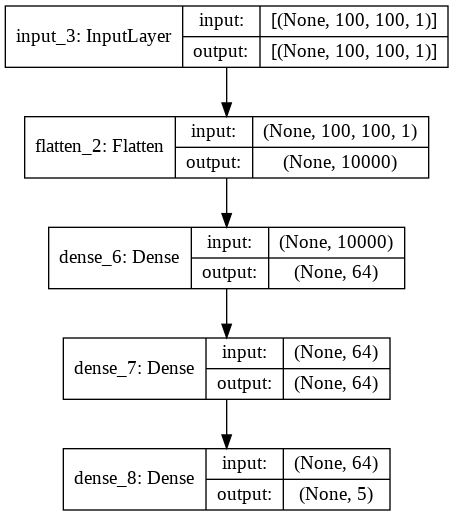

In [68]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

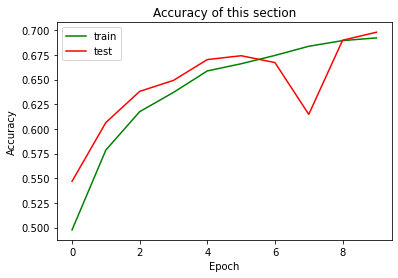

In [69]:
showAccuracy(modelFit)

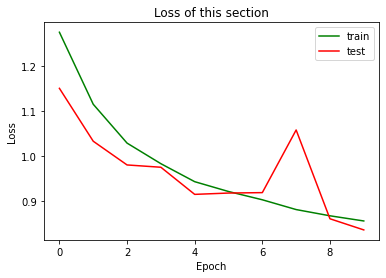

In [70]:
showLoss(modelFit)

<h2> <b>With 0.5 momentum and SGD optimizer</b> </h2>

> ***Momentum*** is a simple technique that often improves both training speed and accuracy. Training a neural network is the process of finding values for the weights and biases so that for a given set of input values, the computed output values closely match the known, correct, target values.

***Momentum*** in neural networks is a variant of the stochastic gradient descent. It replaces the gradient with a ***momentum***.


In [71]:
model = neuralNetwork(momentum = 0.5)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [72]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 28s 50ms/step - loss: 1.2764 - accuracy: 0.4997 - f1_m: 0.3500 - precision_m: 0.6245 - recall_m: 0.2651 - val_loss: 1.0435 - val_accuracy: 0.6240 - val_f1_m: 0.5096 - val_precision_m: 0.7951 - val_recall_m: 0.3784
Epoch 2/10
556/556 [==============================] - 27s 49ms/step - loss: 1.0663 - accuracy: 0.6082 - f1_m: 0.5526 - precision_m: 0.7141 - recall_m: 0.4577 - val_loss: 0.9457 - val_accuracy: 0.6471 - val_f1_m: 0.6150 - val_precision_m: 0.7447 - val_recall_m: 0.5268
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 0.9928 - accuracy: 0.6427 - f1_m: 0.6031 - precision_m: 0.7351 - recall_m: 0.5162 - val_loss: 0.9769 - val_accuracy: 0.6441 - val_f1_m: 0.5934 - val_precision_m: 0.7465 - val_recall_m: 0.4954
Epoch 4/10
556/556 [==============================] - 28s 50ms/step - loss: 0.9388 - accuracy: 0.6649 - f1_m: 0.6333 - precision_m: 0.7514 - recall_m: 0.5514 - val_loss: 1.0315 - val_accuracy: 0.6

In [73]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.40      0.05      0.09        40
      Race 1       0.55      0.84      0.67        92
      Race 2       0.89      0.41      0.56        78
      Race 3       0.85      0.74      0.79       117
      Race 4       0.70      0.84      0.76       229

    accuracy                           0.70       556
   macro avg       0.68      0.58      0.57       556
weighted avg       0.71      0.70      0.68       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        13
      Race 1       0.35      0.73      0.47        22
      Race 2       0.74      0.52      0.61        27
      Race 3       0.81      0.58      0.68        38
      Race 4       0.77      0.84      0.80        86

    accuracy                           0.67       186
   macro avg       0.53      0.53      0.51       186
weighted avg       0.67      0.67      0.65       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


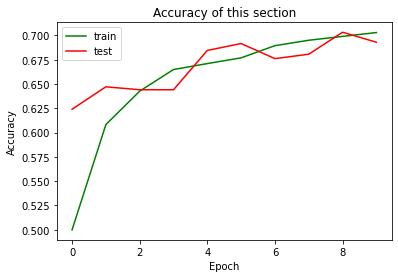

In [74]:
showAccuracy(modelFit)

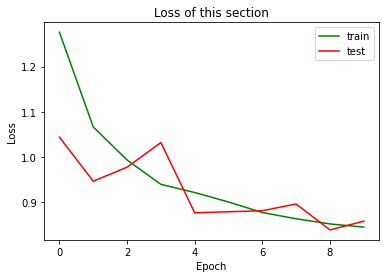

In [75]:
showLoss(modelFit)

**As is shown above, accuracy for both test and train data has slightly improved.**


<h2> <b>With 0.9 momentum and SGD optimizer</b> </h2>

In [76]:
model = neuralNetwork(momentum = 0.9)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [77]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 28s 50ms/step - loss: 1.3674 - accuracy: 0.4770 - f1_m: 0.2839 - precision_m: 0.5502 - recall_m: 0.2140 - val_loss: 1.2651 - val_accuracy: 0.5375 - val_f1_m: 0.4255 - val_precision_m: 0.7044 - val_recall_m: 0.3085
Epoch 2/10
556/556 [==============================] - 27s 49ms/step - loss: 1.2530 - accuracy: 0.5258 - f1_m: 0.4404 - precision_m: 0.6467 - recall_m: 0.3479 - val_loss: 1.3921 - val_accuracy: 0.4796 - val_f1_m: 0.4740 - val_precision_m: 0.5639 - val_recall_m: 0.4108
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 1.2214 - accuracy: 0.5372 - f1_m: 0.4549 - precision_m: 0.6529 - recall_m: 0.3647 - val_loss: 1.1665 - val_accuracy: 0.5537 - val_f1_m: 0.5214 - val_precision_m: 0.6470 - val_recall_m: 0.4397
Epoch 4/10
556/556 [==============================] - 28s 50ms/step - loss: 1.2189 - accuracy: 0.5385 - f1_m: 0.4493 - precision_m: 0.6403 - recall_m: 0.3612 - val_loss: 1.1702 - val_accuracy: 0.5

In [78]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        39
      Race 1       0.39      0.30      0.34        92
      Race 2       1.00      0.01      0.03        74
      Race 3       0.58      0.81      0.68       109
      Race 4       0.62      0.85      0.72       242

    accuracy                           0.58       556
   macro avg       0.52      0.40      0.35       556
weighted avg       0.58      0.58      0.50       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00         8
      Race 1       0.29      0.14      0.19        36
      Race 2       0.00      0.00      0.00        33
      Race 3       0.45      0.78      0.57        27
      Race 4       0.58      0.87      0.70        82

    accuracy                           0.52       186
   macro avg       0.26      0.36      0.29       186
weighted avg       0.38      0.52      0.43       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


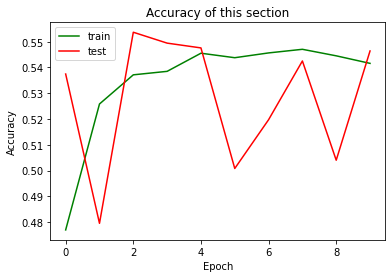

In [79]:
showAccuracy(modelFit)

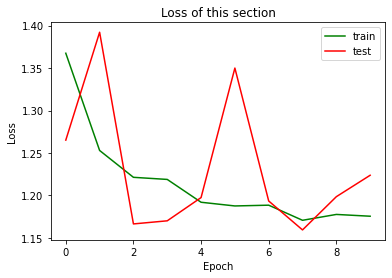

In [80]:
showLoss(modelFit)

<h2> <b>Testing with high momentum (0.98)</b> </h2>

In [81]:
model = neuralNetwork(momentum = 0.98)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [82]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 28s 50ms/step - loss: 1.4638 - accuracy: 0.4221 - f1_m: 0.0336 - precision_m: 0.0542 - recall_m: 0.0290 - val_loss: 1.4595 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
556/556 [==============================] - 27s 49ms/step - loss: 1.4488 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4600 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 1.4493 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4580 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/10
556/556 [==============================] - 28s 49ms/step - loss: 1.4504 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 

In [83]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        37
      Race 1       0.00      0.00      0.00        84
      Race 2       0.00      0.00      0.00        85
      Race 3       0.00      0.00      0.00       127
      Race 4       0.40      1.00      0.57       223

    accuracy                           0.40       556
   macro avg       0.08      0.20      0.11       556
weighted avg       0.16      0.40      0.23       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        11
      Race 1       0.00      0.00      0.00        31
      Race 2       0.00      0.00      0.00        28
      Race 3       0.00      0.00      0.00        37
      Race 4       0.42      1.00      0.60        79

    accuracy                           0.42       186
   macro avg       0.08      0.20      0.12       186
weighted avg       0.18      0.42      0.25       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


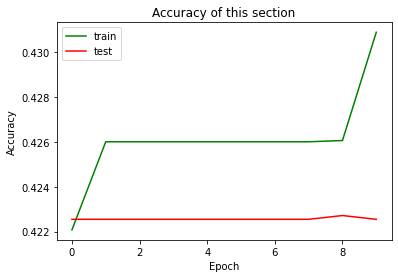

In [84]:
showAccuracy(modelFit)

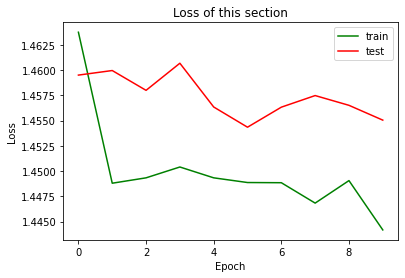

In [85]:
showLoss(modelFit)

But with a higher momentum we get a bad result.

<h2> <b>With Adam optimizer</b> </h2>

> **Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data and more efficiently.

**Adam** has so many effective features:

  *   Straightforward to implement
  *   Computationally efficient
  *   Little memory requirements
  *   Appropriate for problems with very noisy and/or sparse gradients


In [86]:
model = neuralNetwork(opt = 'adam')

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [87]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=10)

Epoch 1/10
556/556 [==============================] - 29s 51ms/step - loss: 1.2285 - accuracy: 0.5312 - f1_m: 0.4150 - precision_m: 0.6405 - recall_m: 0.3243 - val_loss: 0.9972 - val_accuracy: 0.6387 - val_f1_m: 0.5687 - val_precision_m: 0.7693 - val_recall_m: 0.4546
Epoch 2/10
556/556 [==============================] - 28s 50ms/step - loss: 1.0094 - accuracy: 0.6327 - f1_m: 0.5906 - precision_m: 0.7363 - recall_m: 0.4981 - val_loss: 0.9362 - val_accuracy: 0.6564 - val_f1_m: 0.6270 - val_precision_m: 0.7536 - val_recall_m: 0.5400
Epoch 3/10
556/556 [==============================] - 27s 49ms/step - loss: 0.9424 - accuracy: 0.6653 - f1_m: 0.6298 - precision_m: 0.7541 - recall_m: 0.5446 - val_loss: 1.0209 - val_accuracy: 0.6294 - val_f1_m: 0.5759 - val_precision_m: 0.7212 - val_recall_m: 0.4820
Epoch 4/10
556/556 [==============================] - 27s 49ms/step - loss: 0.9238 - accuracy: 0.6708 - f1_m: 0.6426 - precision_m: 0.7592 - recall_m: 0.5610 - val_loss: 0.8575 - val_accuracy: 0.6

In [88]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       1.00      0.02      0.04        44
      Race 1       0.44      0.79      0.56        92
      Race 2       0.72      0.62      0.67        80
      Race 3       0.56      0.83      0.67       101
      Race 4       0.86      0.61      0.71       239

    accuracy                           0.64       556
   macro avg       0.72      0.58      0.53       556
weighted avg       0.73      0.64      0.62       556

Test:
              precision    recall  f1-score   support

      Race 0       1.00      0.10      0.17        21
      Race 1       0.40      0.71      0.52        35
      Race 2       0.86      0.56      0.68        32
      Race 3       0.52      0.90      0.66        31
      Race 4       0.87      0.61      0.72        67

    accuracy                           0.61       186
   macro avg       0.73      0.58      0.55       186
weighted avg       0.74      0.61      0.60       186



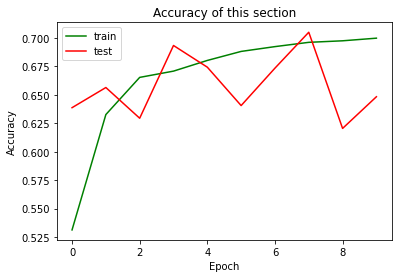

In [89]:
showAccuracy(modelFit)

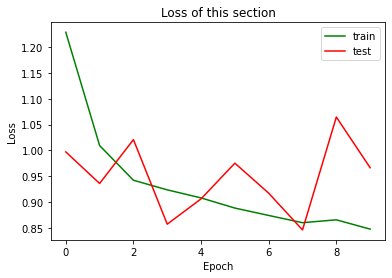

In [90]:
showLoss(modelFit)

<h2> <b>With Adam optimizer and Epochs = 20</b> </h2>

If we want to get the best result that we can, we may need to update the weights. but also in some issues we may get the best training in the first pass and may not need different **Epoch**. However, sometimes it takes more than one to get the best trained model.

**No its not.** <br/>
Training the model more than it is needed may lead to overfitting which is learning the training data so good that it can't learn anymore and it also wont perfom good on the data that it hasn't seen. The solution to do is called early-stopping which is stopping at a low epoch so it wont be overfitted and not so low that it will be underfitted.

In [91]:
model = neuralNetwork(opt = 'adam')

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [92]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=20)

Epoch 1/20
556/556 [==============================] - 29s 50ms/step - loss: 1.2319 - accuracy: 0.5479 - f1_m: 0.4529 - precision_m: 0.6584 - recall_m: 0.3624 - val_loss: 0.9849 - val_accuracy: 0.6304 - val_f1_m: 0.5765 - val_precision_m: 0.7442 - val_recall_m: 0.4740
Epoch 2/20
556/556 [==============================] - 28s 50ms/step - loss: 1.0243 - accuracy: 0.6275 - f1_m: 0.5871 - precision_m: 0.7266 - recall_m: 0.4986 - val_loss: 0.9222 - val_accuracy: 0.6662 - val_f1_m: 0.6335 - val_precision_m: 0.7646 - val_recall_m: 0.5437
Epoch 3/20
556/556 [==============================] - 32s 57ms/step - loss: 0.9559 - accuracy: 0.6570 - f1_m: 0.6235 - precision_m: 0.7414 - recall_m: 0.5421 - val_loss: 0.9728 - val_accuracy: 0.6471 - val_f1_m: 0.6281 - val_precision_m: 0.7363 - val_recall_m: 0.5503
Epoch 4/20
556/556 [==============================] - 27s 49ms/step - loss: 0.9596 - accuracy: 0.6532 - f1_m: 0.6232 - precision_m: 0.7368 - recall_m: 0.5445 - val_loss: 0.8744 - val_accuracy: 0.6

In [93]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.17      0.09      0.11        35
      Race 1       0.56      0.71      0.63        84
      Race 2       0.70      0.81      0.75        77
      Race 3       0.89      0.78      0.83        92
      Race 4       0.81      0.79      0.80       268

    accuracy                           0.73       556
   macro avg       0.63      0.64      0.62       556
weighted avg       0.73      0.73      0.73       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00         9
      Race 1       0.58      0.76      0.66        29
      Race 2       0.62      0.66      0.64        38
      Race 3       0.82      0.80      0.81        41
      Race 4       0.80      0.75      0.78        69

    accuracy                           0.71       186
   macro avg       0.57      0.60      0.58       186
weighted avg       0.70      0.71      0.70       186



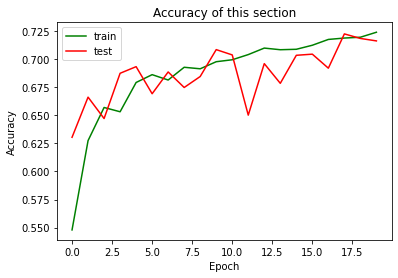

In [94]:
showAccuracy(modelFit)

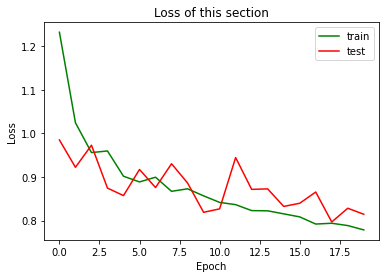

In [95]:
showLoss(modelFit)

<h2> <b>With Relu activation function and Adam optimizer and MSE loss function</b> </h2>

Using **MSE** means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). While in reality, a dataset  is not from a normal distribution but a *Bernoulli distribution*.

**MSE** loss function is mostly used in regressions, were we are going to predict the price of a house, height of a person, ... .

In [96]:
model = neuralNetwork(opt = 'adam',loss = 'MSE')

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [97]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=20)

Epoch 1/20
556/556 [==============================] - 28s 50ms/step - loss: 0.3225 - accuracy: 0.1931 - f1_m: 0.1925 - precision_m: 0.1925 - recall_m: 0.1925 - val_loss: 0.3241 - val_accuracy: 0.1897 - val_f1_m: 0.1888 - val_precision_m: 0.1888 - val_recall_m: 0.1888
Epoch 2/20
556/556 [==============================] - 27s 49ms/step - loss: 0.3235 - accuracy: 0.1913 - f1_m: 0.1914 - precision_m: 0.1914 - recall_m: 0.1914 - val_loss: 0.3241 - val_accuracy: 0.1897 - val_f1_m: 0.1896 - val_precision_m: 0.1896 - val_recall_m: 0.1896
Epoch 3/20
556/556 [==============================] - 27s 49ms/step - loss: 0.3235 - accuracy: 0.1913 - f1_m: 0.1913 - precision_m: 0.1913 - recall_m: 0.1913 - val_loss: 0.3241 - val_accuracy: 0.1897 - val_f1_m: 0.1888 - val_precision_m: 0.1888 - val_recall_m: 0.1888
Epoch 4/20
556/556 [==============================] - 27s 49ms/step - loss: 0.3478 - accuracy: 0.1305 - f1_m: 0.1305 - precision_m: 0.1305 - recall_m: 0.1305 - val_loss: 0.3702 - val_accuracy: 0.0

In [98]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.06      1.00      0.11        32
      Race 1       0.00      0.00      0.00        91
      Race 2       0.00      0.00      0.00       101
      Race 3       0.00      0.00      0.00       100
      Race 4       0.00      0.00      0.00       232

    accuracy                           0.06       556
   macro avg       0.01      0.20      0.02       556
weighted avg       0.00      0.06      0.01       556

Test:
              precision    recall  f1-score   support

      Race 0       0.05      1.00      0.10        10
      Race 1       0.00      0.00      0.00        24
      Race 2       0.00      0.00      0.00        31
      Race 3       0.00      0.00      0.00        34
      Race 4       0.00      0.00      0.00        87

    accuracy                           0.05       186
   macro avg       0.01      0.20      0.02       186
weighted avg       0.00      0.05      0.01       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


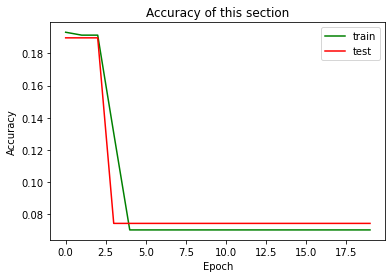

In [99]:
showAccuracy(modelFit)

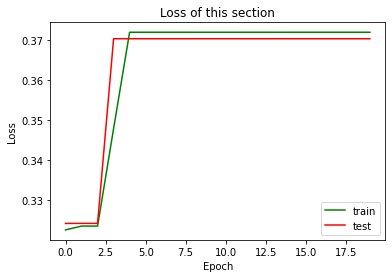

In [100]:
showLoss(modelFit)

<h2> <b>With Adam optimizer and Regularization</b> </h2>

> **Regularization** is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well
**regularization** penalizes the coefficients. In deep learning, it actually penalizes the weight matrices of the nodes.

L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the L2 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large weight values. The two most common error functions used in neural network training are squared error and cross entropy error.

In L2 regularization you add a fraction (often called the L2 regularization constant) of the sum of the squared weight values to the base error
On each training iteration, each weight is decayed toward zero by a small fraction of the weight's current value.

In [101]:
model = neuralNetwork(opt = 'adam', regularization = 1)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 325       
Total params: 644,549
Trainable params: 644,549
Non-trainable params: 0
_________________________________________________________________


In [102]:
bestModel = model

In [103]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=20)

Epoch 1/20
556/556 [==============================] - 34s 60ms/step - loss: 1.2695 - accuracy: 0.5330 - f1_m: 0.4368 - precision_m: 0.6623 - recall_m: 0.3460 - val_loss: 1.0394 - val_accuracy: 0.6370 - val_f1_m: 0.5592 - val_precision_m: 0.7863 - val_recall_m: 0.4382
Epoch 2/20
556/556 [==============================] - 29s 52ms/step - loss: 1.0363 - accuracy: 0.6341 - f1_m: 0.5818 - precision_m: 0.7281 - recall_m: 0.4901 - val_loss: 1.0898 - val_accuracy: 0.5830 - val_f1_m: 0.5668 - val_precision_m: 0.6314 - val_recall_m: 0.5157
Epoch 3/20
556/556 [==============================] - 29s 52ms/step - loss: 0.9819 - accuracy: 0.6548 - f1_m: 0.6195 - precision_m: 0.7443 - recall_m: 0.5356 - val_loss: 0.9783 - val_accuracy: 0.6482 - val_f1_m: 0.6341 - val_precision_m: 0.7108 - val_recall_m: 0.5741
Epoch 4/20
556/556 [==============================] - 29s 52ms/step - loss: 0.9549 - accuracy: 0.6628 - f1_m: 0.6355 - precision_m: 0.7501 - recall_m: 0.5552 - val_loss: 0.9007 - val_accuracy: 0.6

In [104]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       1.00      0.03      0.06        31
      Race 1       0.71      0.71      0.71        99
      Race 2       0.73      0.90      0.80        78
      Race 3       0.83      0.72      0.77       118
      Race 4       0.76      0.86      0.81       230

    accuracy                           0.76       556
   macro avg       0.81      0.64      0.63       556
weighted avg       0.78      0.76      0.74       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        12
      Race 1       0.59      0.71      0.65        28
      Race 2       0.80      0.76      0.78        37
      Race 3       0.81      0.63      0.71        35
      Race 4       0.75      0.89      0.81        74

    accuracy                           0.73       186
   macro avg       0.59      0.60      0.59       186
weighted avg       0.70      0.73      0.71       186



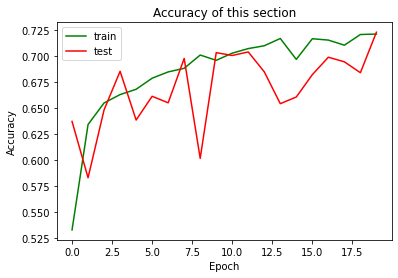

In [105]:
showAccuracy(modelFit)

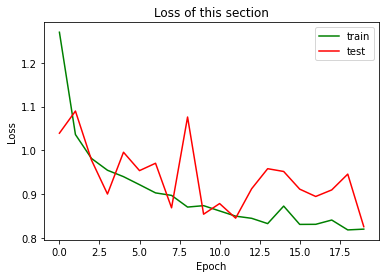

In [106]:
showLoss(modelFit)

<h2> <b> With Adam optimizer and Dropout</b> </h2>

> **Dropping out** is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.

At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections. So each iteration has a different set of nodes and this results in a different set of outputs.


In [107]:
model = neuralNetwork(opt = 'adam', dropOut = 1)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 325

In [108]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=20)

Epoch 1/20
556/556 [==============================] - 29s 50ms/step - loss: 1.4121 - accuracy: 0.4270 - f1_m: 0.2717 - precision_m: 0.6417 - recall_m: 0.1870 - val_loss: 1.4105 - val_accuracy: 0.4254 - val_f1_m: 0.1204 - val_precision_m: 0.8030 - val_recall_m: 0.0664
Epoch 2/20
556/556 [==============================] - 28s 50ms/step - loss: 1.3289 - accuracy: 0.4580 - f1_m: 0.3516 - precision_m: 0.7327 - recall_m: 0.2407 - val_loss: 1.2649 - val_accuracy: 0.5123 - val_f1_m: 0.4282 - val_precision_m: 0.7126 - val_recall_m: 0.3106
Epoch 3/20
556/556 [==============================] - 28s 50ms/step - loss: 1.3093 - accuracy: 0.4792 - f1_m: 0.3656 - precision_m: 0.7335 - recall_m: 0.2539 - val_loss: 1.3143 - val_accuracy: 0.5015 - val_f1_m: 0.4525 - val_precision_m: 0.5911 - val_recall_m: 0.3691
Epoch 4/20
556/556 [==============================] - 28s 50ms/step - loss: 1.3002 - accuracy: 0.4871 - f1_m: 0.3723 - precision_m: 0.7299 - recall_m: 0.2601 - val_loss: 1.2647 - val_accuracy: 0.5

In [109]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        45
      Race 1       0.33      0.22      0.27        94
      Race 2       0.00      0.00      0.00        77
      Race 3       0.70      0.54      0.61       112
      Race 4       0.53      0.95      0.68       228

    accuracy                           0.54       556
   macro avg       0.31      0.34      0.31       556
weighted avg       0.42      0.54      0.45       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        14
      Race 1       0.10      0.08      0.09        25
      Race 2       0.00      0.00      0.00        36
      Race 3       0.76      0.52      0.62        31
      Race 4       0.51      0.91      0.65        80

    accuracy                           0.49       186
   macro avg       0.27      0.30      0.27       186
weighted avg       0.36      0.49      0.39       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


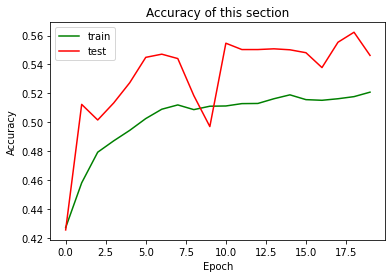

In [110]:
showAccuracy(modelFit)

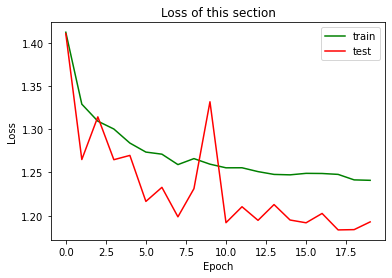

In [111]:
showLoss(modelFit)

<h2> <b> With Adam optimization and regularization and Dropout </b> </h2>

In [112]:
model = neuralNetwork(opt = 'adam', regularization = 1, dropOut=1)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 325

In [113]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=20)

Epoch 1/20
556/556 [==============================] - 30s 53ms/step - loss: 1.5051 - accuracy: 0.4189 - f1_m: 0.0455 - precision_m: 0.1207 - recall_m: 0.0320 - val_loss: 1.4660 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
556/556 [==============================] - 29s 52ms/step - loss: 1.4580 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4628 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
556/556 [==============================] - 29s 52ms/step - loss: 1.4564 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4606 - val_accuracy: 0.4225 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
556/556 [==============================] - 29s 52ms/step - loss: 1.4539 - accuracy: 0.4260 - f1_m: 0.0000e+00 - precision_m: 

In [114]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        47
      Race 1       0.00      0.00      0.00        94
      Race 2       0.00      0.00      0.00        82
      Race 3       0.00      0.00      0.00       114
      Race 4       0.39      1.00      0.57       219

    accuracy                           0.39       556
   macro avg       0.08      0.20      0.11       556
weighted avg       0.16      0.39      0.22       556

Test:
              precision    recall  f1-score   support

      Race 0       0.00      0.00      0.00        14
      Race 1       0.00      0.00      0.00        36
      Race 2       0.00      0.00      0.00        20
      Race 3       0.00      0.00      0.00        45
      Race 4       0.38      1.00      0.55        71

    accuracy                           0.38       186
   macro avg       0.08      0.20      0.11       186
weighted avg       0.15      0.38      0.21       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


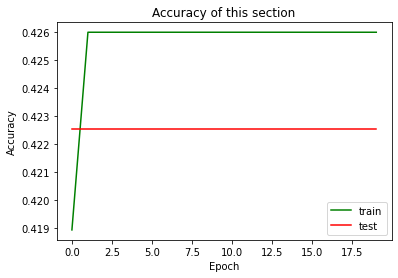

In [115]:
showAccuracy(modelFit)

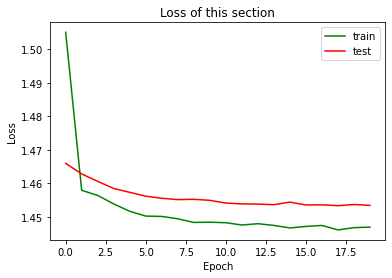

In [116]:
showLoss(modelFit)

True prediction its race 1


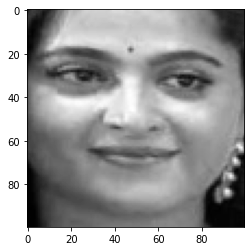

True prediction its race 4


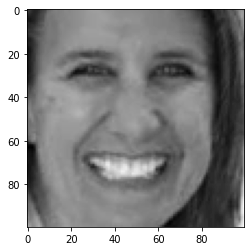

True prediction its race 4


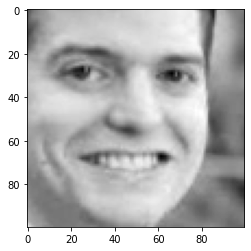

False prediction its race 0 but was predicted 2


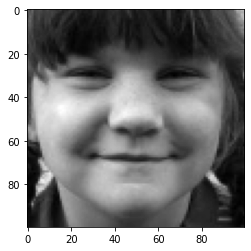

True prediction its race 3


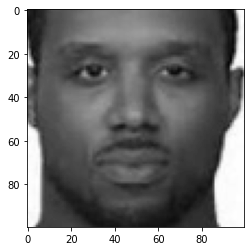

True prediction its race 4


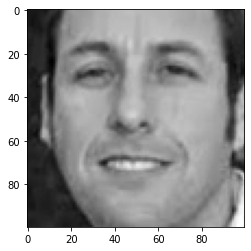

True prediction its race 4


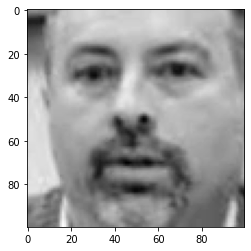

True prediction its race 1


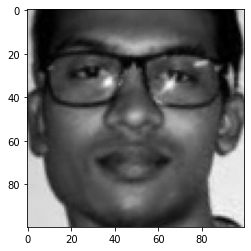

True prediction its race 2


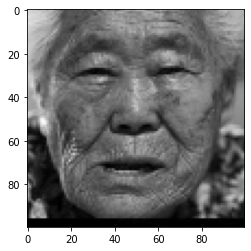

False prediction its race 1 but was predicted 4


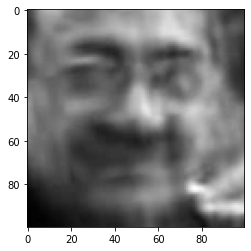

True prediction its race 3


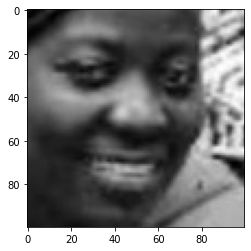

False prediction its race 1 but was predicted 4


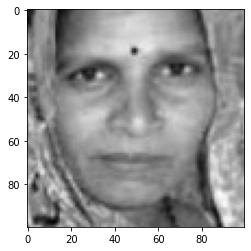

True prediction its race 1


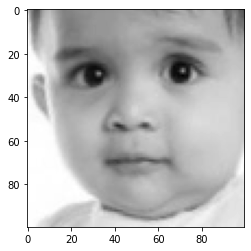

False prediction its race 3 but was predicted 1


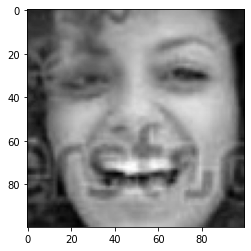

False prediction its race 4 but was predicted 1


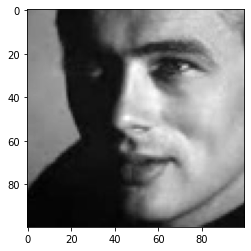

False prediction its race 2 but was predicted 4


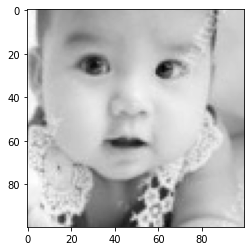

False prediction its race 3 but was predicted 4


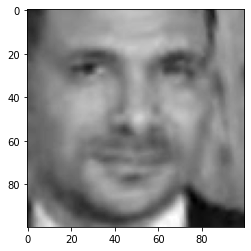

False prediction its race 3 but was predicted 1


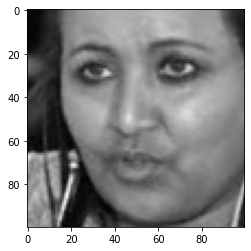

False prediction its race 1 but was predicted 2


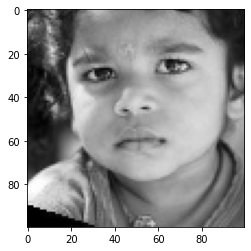

False prediction its race 0 but was predicted 1


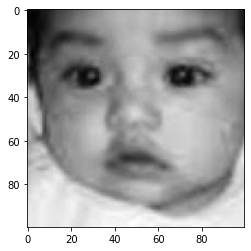

In [117]:
trueFounded = 0
falseFounded = 0
for i in range(len(testGenerator)):
  if trueFounded == 10 and falseFounded == 10: break
  pic = testGenerator[i][0][0].reshape(100,100)
  x = bestModel.predict(np.reshape(testGenerator[i][0][0],[1,100,100,1]))
  predictClass = np.argmax(x,axis=1)
  for j in range(len(testGenerator[i][1][0])):
    if testGenerator[i][1][0][j]:
      if j == predictClass[0] and trueFounded < 10: 
        print('\033[92m' + 'True prediction its race',j)
        trueFounded += 1
        plt.imshow(pic,cmap='gray')
        plt.show()
      elif j != predictClass[0] and falseFounded < 10: 
        print('\033[91m' + 'False prediction its race {} but was predicted {}'.format(j,predictClass[0]))
        falseFounded += 1
        plt.imshow(pic,cmap='gray')
        plt.show()
      break

In [4]:
inputLayer = layers.Input(shape=(100,100,1))
flatten = layers.Flatten()(inputLayer)
firstLayer = layers.Dense(10000, activation = 'relu')(flatten)
secondLayer = layers.Dense(128, activation = 'relu')(firstLayer)
thirdLayer = layers.Dense(16, activation = 'relu')(secondLayer)
fourthLayer = layers.Dense(2, activation = 'sigmoid')(thirdLayer)
finalLayer = layers.Dense(5, activation="softmax")(fourthLayer)

model = models.Model(inputs=inputLayer, outputs=finalLayer)
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy", f1_m, precision_m, recall_m])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10000)             100010000 
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_7 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 15  

In [29]:
modelFit = model.fit(trainGenerator, validation_data = testGenerator ,epochs=4)

Epoch 1/4
556/556 [==============================] - 342s 614ms/step - loss: 1.4468 - accuracy: 0.4264 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4508 - val_accuracy: 0.4214 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/4
556/556 [==============================] - 340s 611ms/step - loss: 1.4467 - accuracy: 0.4264 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4508 - val_accuracy: 0.4214 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/4
556/556 [==============================] - 339s 611ms/step - loss: 1.4467 - accuracy: 0.4264 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.4509 - val_accuracy: 0.4214 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/4
556/556 [==============================] - 340s 612ms/step - loss: 1.4467 - accuracy: 0.4264 - f1_m: 0.0000e+00

In [32]:
predict(model)

Train:
              precision    recall  f1-score   support

      Race 0       0.43      1.00      0.60       240
      Race 1       0.00      0.00      0.00       100
      Race 2       0.00      0.00      0.00        82
      Race 3       0.00      0.00      0.00        88
      Race 4       0.00      0.00      0.00        46

    accuracy                           0.43       556
   macro avg       0.09      0.20      0.12       556
weighted avg       0.19      0.43      0.26       556

Test:
              precision    recall  f1-score   support

      Race 0       0.40      1.00      0.57        74
      Race 1       0.00      0.00      0.00        48
      Race 2       0.00      0.00      0.00        27
      Race 3       0.00      0.00      0.00        27
      Race 4       0.00      0.00      0.00        10

    accuracy                           0.40       186
   macro avg       0.08      0.20      0.11       186
weighted avg       0.16      0.40      0.23       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


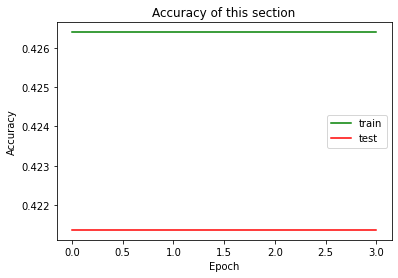

In [36]:
showAccuracy(modelFit)

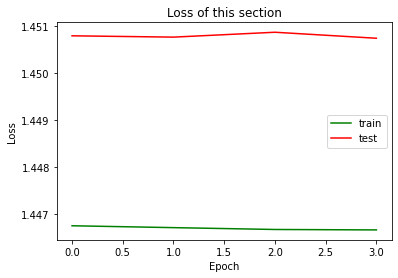

In [37]:
showLoss(modelFit)